# LeNet-1 with Keras (and PyTorch)

Good readings:

* [LeCun backpropagation applied to handwritten zip code recognition](https://ieeexplore.ieee.org/document/6795724 )
* [GradientBased Learning Applied to Document Recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

## Preparations

As usual, let's start with the following preparations.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "torch"

# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

## USPS Dataset

The first paper on LeNet-1 used the USPS dataset. We will load and format the dataset. As the results, we will have `n` samples of `(16 x 16)` arrays for both the training and testing datasets.

In [13]:
import h5py
with h5py.File("./datasets/usps/usps.h5", 'r') as hf:
    x_train = hf.get("train").get('data')[:].reshape(-1, 16, 16) * 255.0
    y_train = np.int32(hf.get("train").get('target')[:]) 

    x_test = hf.get("test").get('data')[:].reshape(-1, 16, 16) * 255.0
    y_test = np.int32(hf.get("test").get('target')[:]) 

print("Training data:")
print("Dimension numbers :", x_train.shape[1] * x_train.shape[2])
print("Number of data    :", x_train.shape[0])

print("\nTesting data:")
print("Dimension numbers :", x_test.shape[1] * x_test.shape[2])
print("Number of data    :", x_test.shape[0])


Training data:
Dimension numbers : 256
Number of data    : 7291

Testing data:
Dimension numbers : 256
Number of data    : 2007


Here, we convert a flattened data back into a 2d matrix.

In [14]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 16, 16, 1)
x_test = x_test.reshape(x_test.shape[0], 16, 16, 1)


# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Let's plot some of the data for visualization purposes.

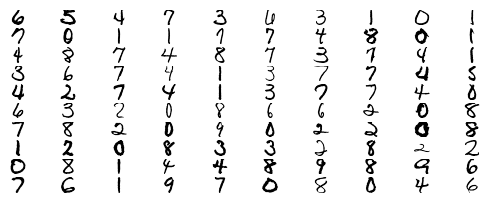

In [15]:
for i in range(100):
    X = x_train[i,:,:]
    plt.subplot(20, 10, i + 1)
    plt.imshow(X.astype('uint8'), cmap='Greys')
    plt.axis('off')

## Building the Model Architecture


All kerenels are `5 x 5`. To maintain the image dimension, we apply two layers of zero-padding. The stride length for the convolution is `1`.

Down sizing the features are done by using max pooling with a window of `2 x 2` and a stride length of `2`.

![](./images/lenet-1.png)

Create the Keras sequential model based on the model architecture diagram.

The sequential order of the CNN is as follows: 

`input --> C1 --> reLU --> M1 --> C2 --> ReLU --> M2 --> FCN`

where C and M are convolutional and max-pooling layers, respectively. FCN is a fully-connected network layer.

In [16]:
model = Sequential()
model.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model.add(Conv2D(12, kernel_size=(5, 5), activation='relu', input_shape=(20, 20, 1), name='C1'))
model.add(MaxPooling2D(pool_size=(2, 2), name='M1'))
model.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model.add(Conv2D(12, kernel_size=(5, 5), activation='relu', name='C2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='M2'))
model.add(Flatten())
model.add(Dense(192, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/auralius/miniconda3/envs/py.3.12.4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile and Train

In [17]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=64, epochs=30, verbose=2, validation_data=(x_test, y_test));

Epoch 1/30
114/114 - 2s - 21ms/step - accuracy: 0.7312 - loss: 1.7605 - val_accuracy: 0.8645 - val_loss: 0.5492
Epoch 2/30
114/114 - 2s - 21ms/step - accuracy: 0.9225 - loss: 0.2777 - val_accuracy: 0.9003 - val_loss: 0.3812
Epoch 3/30
114/114 - 2s - 20ms/step - accuracy: 0.9536 - loss: 0.1499 - val_accuracy: 0.9098 - val_loss: 0.3722
Epoch 4/30
114/114 - 2s - 19ms/step - accuracy: 0.9701 - loss: 0.0977 - val_accuracy: 0.9273 - val_loss: 0.3570
Epoch 5/30
114/114 - 2s - 19ms/step - accuracy: 0.9801 - loss: 0.0669 - val_accuracy: 0.9297 - val_loss: 0.3470
Epoch 6/30
114/114 - 2s - 19ms/step - accuracy: 0.9838 - loss: 0.0525 - val_accuracy: 0.9397 - val_loss: 0.2981
Epoch 7/30
114/114 - 2s - 20ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9437 - val_loss: 0.3288
Epoch 8/30
114/114 - 2s - 21ms/step - accuracy: 0.9908 - loss: 0.0273 - val_accuracy: 0.9412 - val_loss: 0.3233
Epoch 9/30
114/114 - 2s - 20ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9402 - val_loss:

## Test Accuracy

Lest evaluate the training results with the test dataset.

In [19]:
score = model.evaluate(x_test, y_test, verbose=2)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

63/63 - 0s - 8ms/step - accuracy: 0.9522 - loss: 0.3749
Test Loss: 0.3749450743198395
Test accuracy: 0.9521673917770386


## Store the Weights to Files

In [20]:
print('\nshape of each layer:')
weights = model.get_weights()
for k in range(len(weights)):
    print(model.layers[k])
    print('\t', weights[k].shape)
    print('-------------------------------------------------')


shape of each layer:
<ZeroPadding2D name=zero_padding2d_2, built=True>
	 (5, 5, 1, 12)
-------------------------------------------------
<Conv2D name=C1, built=True>
	 (12,)
-------------------------------------------------
<MaxPooling2D name=M1, built=True>
	 (5, 5, 12, 12)
-------------------------------------------------
<ZeroPadding2D name=zero_padding2d_3, built=True>
	 (12,)
-------------------------------------------------
<Conv2D name=C2, built=True>
	 (192, 192)
-------------------------------------------------
<MaxPooling2D name=M2, built=True>
	 (192,)
-------------------------------------------------
<Flatten name=flatten_1, built=True>
	 (192, 30)
-------------------------------------------------
<Dense name=dense_3, built=True>
	 (30,)
-------------------------------------------------
<Dense name=dense_4, built=True>
	 (30, 10)
-------------------------------------------------
<Dense name=dense_5, built=True>
	 (10,)
-------------------------------------------------


In [21]:
for k in range (len(weights)):
    fn = './datasets/usps/weight-' + str(k+1)
    np.save(fn, weights[k])